# CEO Questions 

## Business question
1. What are the properties that House Rocket should i buy it and at what price?
2. Once the house is purchased, what is the best when to sell them and at what price?

## Imports

In [534]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from matplotlib import pyplot as plt
import ipywidgets as widgets
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual
from geopy.geocoders import Nominatim
import missingno                                   as msno


## Auxiliary functions 

In [505]:
## # Supress Scientific Notation

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

## Loading data

In [506]:
df=pd.read_csv('Datasets/kc_house_data.csv',parse_dates=[1,14])

## Dataset info

In [507]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955-01-01,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951-01-01,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933-01-01,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965-01-01,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987-01-01,0,98074,47.62,-122.05,1800,7503


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  datetime64[ns]
 15  yr_renovated   2161

### Change types

In [509]:
df['condition'] = df['condition'].astype( str )
df['yr_renovated'] = df['yr_renovated'].apply( lambda x: pd.to_datetime( x,format='%Y') if x > 0 else x )

| Attributes     | Meaning                                                                                                                                                                                              |
|----------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id             | Unique ID for each home sold                                                                                                                                                                         |
| date           | Date of the home sale                                                                                                                                                                                |
| price          | Price of each home sold                                                                                                                                                                              |
| bedrooms       | Number of bedrooms                                                                                                                                                                                   |
| bathrooms      | Number of bathrooms, where .5 accounts for a room with a toilet but no shower                                                                                                                        |
| sqft_living    | Square footage of the apartments interior living space                                                                                                                                               |
| sqft_lot       | Square footage of the land space                                                                                                                                                                     |
| floors         | Number of floors                                                                                                                                                                                     |
| waterfront     | A dummy variable for whether the apartment was overlooking the waterfront or not                                                                                                                     |
| view           | An index from 0 to 4 of how good the view of the property was                                                                                                                                        |
| condition      | An index from 1 to 5 on the condition of the apartment                                                                                                                                               |
| grade          | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. |
| sqft_above     | The square footage of the interior housing space that is above ground level                                                                                                                          |
| sqft_basement  | The square footage of the interior housing space that is below ground level                                                                                                                          |
| yr_built       | The year the house was initially built                                                                                                                                                               |
| yr_renovated   | The year of the house’s last renovation                                                                                                                                                              |
| zipcode        | What zipcode area the house is in                                                                                                                                                                    |
| sqft_living15  | The square footage of interior housing living space for the nearest 15 neighbors                                                                                                                     |
| sqft_lot15     | The square footage of the land lots of the nearest 15 neighbors    

### Insights

1. How many homes are available for purchase?
2. How many attributes do houses have?
3. What are the attributes of the houses?
4. What is the most expensive house (house with the highest sale value)?
5. Which house has the most rooms?
6. What is the sum total of quarters in the dataset?
7. How many houses have 2 bathrooms?
8. What is the average price of all houses in the dataset?
9. What is the average price of 2 bathroom homes?
10. What is the minimum price for 3 bedroom homes?
11. How many houses have more than 300 square meters in the living room?
Of being?
12. How many houses have more than 2 floors?
13. How many houses have a sea view?
14. Of the houses with sea views, how many have 3 bedrooms?
15. Of the houses with more than 300 square meters of living room,
how many have more than 2 bathrooms?

In [510]:
print( 'Number of houses available for purchase: {}'.format( df.shape[0] ) )
print( 'Features by house: {}'.format( df.shape[1] ) )

Number of houses available for purchase: 21613
Features by house: 21


In [511]:
house_expensive_id = df[['id', 'price']].sort_values('price', ascending=False ).loc[0,'id']
print( 'Features by house: {}'.format( house_expensive_id) )
house_bedrooms_id = df[['id', 'bedrooms']].sort_values('bedrooms', ascending=False ).iloc[0,0]
print( 'Features by house: {}'.format( house_bedrooms_id) )
print( 'summ bedrooms: {}'.format( df['bedrooms'].sum() ))
data = df.loc[df['bathrooms'] == 2, :]
num_houses = len( data )
print( 'Total number of houses with 2 bathrooms: {}'.format( num_houses ) )
avg_price = np.round( df['price'].mean(), 2 )
print( 'Average Price: ${}'.format( avg_price ) )
avg_price = np.round( data.loc[data['bathrooms'] == 2, 'price'].mean(), 2 )
print( 'Average Price: ${}'.format( avg_price ) )
min_price = np.round( df.loc[df['bedrooms'] == 3, 'price'].min(), 2 )
print( 'Min Price: ${}'.format( min_price ))
houses = df.loc[df['sqft_living'] > 300, 'id'].shape[0]
print( 'There are {} Houses with living room grater than 300 square foot'.format( houses ) )
houses = df.loc[df['floors'] > 2, 'id'].shape[0]
print( 'There are {} Houses with the number of floors grater than 2'.format(houses ) )
houses = df.loc[df['floors'] == 1, 'id'].shape[0]
print( 'There are {} Houses with the number of floors grater than 2'.format(houses ) )
houses = df.loc[(df['waterfront'] == 1) & (df['bedrooms'] > 2), 'id'].shape[0]
print( 'There are {} Houses with waterfront and bedrooms greater then 3'.format( houses ) )
houses = df.loc[(df['sqft_living'] > 300) & (df['bathrooms'] > 2), 'id'].shape[0]
print( 'There are {} Houses with living room greater than 300 and bathrooms bigger than 2'.format( houses ) )


Features by house: 7129300520
Features by house: 2402100895
summ bedrooms: 72854
Total number of houses with 2 bathrooms: 1930
Average Price: $540088.14
Average Price: $457889.72
Min Price: $82000.0
There are 21612 Houses with living room grater than 300 square foot
There are 782 Houses with the number of floors grater than 2
There are 10680 Houses with the number of floors grater than 2
There are 127 Houses with waterfront and bedrooms greater then 3
There are 11242 Houses with living room greater than 300 and bathrooms bigger than 2


## “house_age”
- Se o valor da coluna “date” for maior que 2014-01-01 => ‘new_house’
- Se o valor da coluna “date” for menor que 2014-01-01 => ‘old_house’


In [512]:
df['house_age'] = 'NA'
df.loc[df['date'] > '2015-01-01', 'house_age'] = 'new_house'
df.loc[df['date'] < '2015-01-01', 'house_age'] = 'old_house'

## “dormitory_type”
- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
- Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’


In [513]:
df['dormitory_type'] = 'NA'
for i in range( len( df ) ):
    if df.loc[i, 'bedrooms'] == 1:
        df.loc[i, 'dormitory_type'] = 'studio'
        
    elif df.loc[i, 'bedrooms'] == 2:
        df.loc[i, 'dormitory_type'] = 'apartment'
        
    elif df.loc[i, 'bedrooms'] > 2:
        df.loc[i, 'dormitory_type'] = 'house'

## “condition_type”
- Se o valor da coluna “condition” for menor ou igual à 2 => ‘bad’
- Se o valor da coluna “condition” for igual à 3 ou 4 => ‘regular’
- Se o valor da coluna “condition” for igual à 5 => ‘good’


In [514]:
df['condition_type']=df['condition'].apply(lambda x:'bad' if x== '2' else 
                                                  'regular' if (x=="3" or x=="4") else 
                                                  'good' if x==5 else 'NA') 


In [515]:
houses = df[df['condition_type'] == 'regular'].shape[0]
print( 'Number of Houses in "regular" condition is: {}'.format( houses ) )

Number of Houses in "regular" condition is: 19710


In [516]:
houses = df[(df['condition_type'] == 'bad') & (df['waterfront'] == 1)].shape[0]
print( "Number of Houses with water view and bad condition: {}".format( houses) )

Number of Houses with water view and bad condition: 1


In [517]:
houses = df[(df['condition_type'] == 'good') & (df['house_age'] =="new_house")].shape[0]
print( "Number of new house with good conditional type is: {}".format( houses ))

Number of new house with good conditional type is: 0


In [518]:
max_studio_price = df[df['dormitory_type'] == 'studio']['price'].max()
print( "Most expensive studio house: ${}".format( max_studio_price ) )

Most expensive studio house: $1247000.0


In [519]:
houses = df[(df['house_age'] == 'new_house') &
(df['yr_renovated'] == 2014 )].shape[0]
print( "Number of reformed house in 2014: {}".format( houses ) )

Number of reformed house in 2014: 0


## Qual a média do preço de compra dos imóveis por “Nível”? - 
- Nível 0 -> Preço entre R$ 0 e R$ 321.950 
- Nível 1 -> Preço entre R$ 321.950 e R$ 450.000 
- Nível 2 -> Preço entre R$ 450.000 e R$ 645.000 
- Nível 3 -> Acima de R$ 645.000


In [520]:
df['level']=df['price'].apply(lambda x:'level_00' if (x >=0)&(x<321950) else
                                      'level_01' if (x >=321950)&(x<450000) else
                                      'level_02' if (x >=45000)&(x<645000) else 'level_03')

In [521]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,dormitory_type,condition_type,level
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,0,98178,47.51,-122.26,1340,5650,old_house,house,regular,level_00
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,1991-01-01 00:00:00,98125,47.72,-122.32,1690,7639,old_house,house,regular,level_02
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,0,98028,47.74,-122.23,2720,8062,new_house,apartment,regular,level_00
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,0,98136,47.52,-122.39,1360,5000,old_house,house,NA,level_02
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,0,98074,47.62,-122.05,1800,7503,new_house,house,regular,level_02


## Qual a média do tamanho da sala de estar dos imóveis por “Size” ? 
- Size 0 -> Tamanho entre 0 e 1427 sqft 
- Size 1 -> Tamanho entre 1427 e 1910 sqft 
- Size 2 -> Tamanho entre 1910 e 2550 sqft 
- Size 3 -> Tamanho acima de 2550 sqft

In [522]:
df['size']=df['sqft_living'].apply(lambda x:'s00' if (x >=0)&(x<1427) else
                                      's01' if (x >=1427)&(x<1910) else
                                      's02' if (x >=1910)&(x<2550) else 's03')

In [523]:
df[['size','sqft_living']].groupby('size').mean().reset_index()

,size,sqft_living
0,s00,1123.78
1,s01,1661.20
2,s02,2202.70
3,s03,3318.99


In [524]:
df['size']=df['sqft_above']

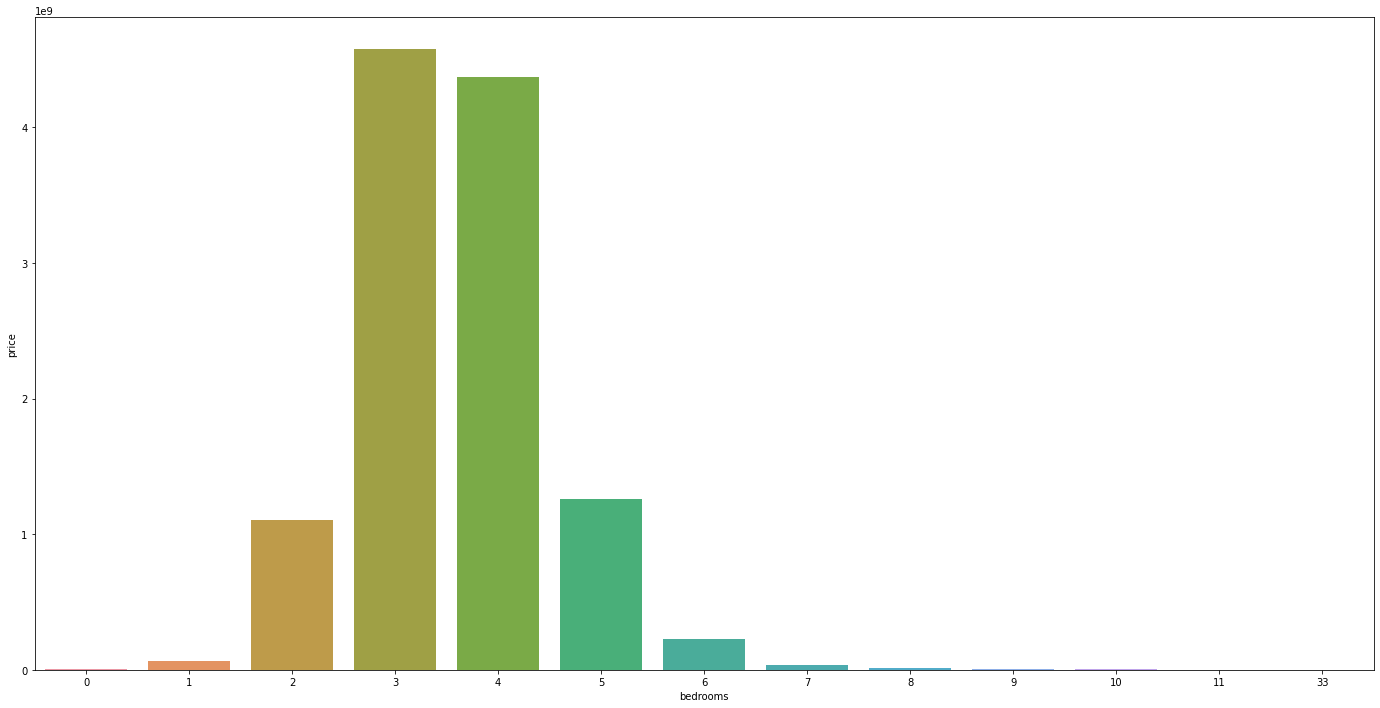

In [525]:
plt.figure( figsize=(24,12))
data = df[['price', 'bedrooms']].groupby( 'bedrooms' ).sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=data );

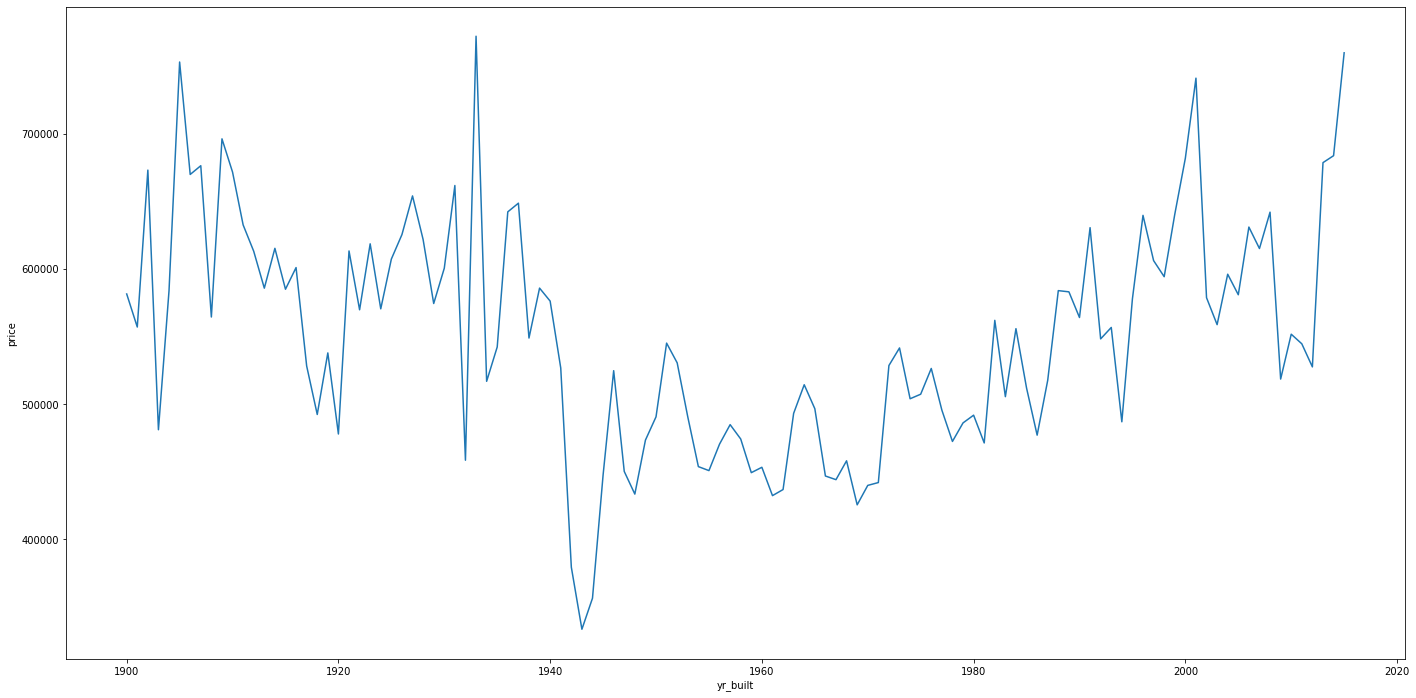

In [526]:
plt.figure( figsize=(24,12))
data = df[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
sns.lineplot( x='yr_built', y='price', data=data );

In [527]:
plt.figure( figsize=(24,12))
data = df[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()
sns.barplot( x='dormitory_type', y='price', df=data );

ValueError: Could not interpret input 'dormitory_type'

<Figure size 1728x864 with 0 Axes>

## Adicione as seguinte informações ao conjunto de dados original: 
- Place ID: Identificação da localização 
- OSM Type: Open Street Map type 
- Country: Nome do País 
- Country Code: Código do País


In [528]:
import pandas as pd
from geopy.geocoders import Nominatim

#Create empty rows
df['road']='NA'
df['house_number']='NA'
df['city']='NA'
df['county']='NA'
df['state']='NA'
df['neighbourhood']='NA'

geolocator=Nominatim(user_agent='geoapiExercises')

for i in range(len(df)):
    print('Loop:{}/{}'.format(i,len(df)))
    df
    query=str(df.loc[i,'lat'])+','+str(df.loc[i,'long'])

#API Request
    response=geolocator.reverse(query)

#populate df
    if 'house_number' in response.raw['address']:
        df.loc[i,'house_number']=response.raw['address']['house_number']
    if 'road' in response.raw['address']:
        df.loc[i,'road']        =response.raw['address']['road']
    if 'city' in response.raw['address']:
        df.loc[i,'city']        =response.raw['address']['city']
    if 'county' in response.raw['address']:
        df.loc[i,'county']      =response.raw['address']['county']
    if 'state' in response.raw['address']:
        df.loc[i,'state']       =response.raw['address']['state']
    if 'neighbourhood' in response.raw['address']:
        df.loc[i,'neighbourhood']=response.raw['address']['neighbourhood']



Loop:0/21613
Loop:1/21613
Loop:2/21613
Loop:3/21613
Loop:4/21613
Loop:5/21613
Loop:6/21613
Loop:7/21613
Loop:8/21613
Loop:9/21613
Loop:10/21613
Loop:11/21613
Loop:12/21613
Loop:13/21613
Loop:14/21613
Loop:15/21613
Loop:16/21613
Loop:17/21613
Loop:18/21613
Loop:19/21613
Loop:20/21613
Loop:21/21613
Loop:22/21613
Loop:23/21613
Loop:24/21613
Loop:25/21613
Loop:26/21613
Loop:27/21613
Loop:28/21613
Loop:29/21613
Loop:30/21613
Loop:31/21613
Loop:32/21613
Loop:33/21613
Loop:34/21613
Loop:35/21613
Loop:36/21613
Loop:37/21613
Loop:38/21613
Loop:39/21613
Loop:40/21613
Loop:41/21613
Loop:42/21613
Loop:43/21613
Loop:44/21613
Loop:45/21613
Loop:46/21613
Loop:47/21613
Loop:48/21613
Loop:49/21613
Loop:50/21613
Loop:51/21613
Loop:52/21613
Loop:53/21613
Loop:54/21613
Loop:55/21613
Loop:56/21613
Loop:57/21613
Loop:58/21613
Loop:59/21613
Loop:60/21613
Loop:61/21613
Loop:62/21613
Loop:63/21613
Loop:64/21613
Loop:65/21613
Loop:66/21613
Loop:67/21613
Loop:68/21613
Loop:69/21613
Loop:70/21613
Loop:71/21613
Lo

Loop:554/21613
Loop:555/21613
Loop:556/21613
Loop:557/21613
Loop:558/21613
Loop:559/21613
Loop:560/21613
Loop:561/21613
Loop:562/21613
Loop:563/21613
Loop:564/21613
Loop:565/21613
Loop:566/21613
Loop:567/21613
Loop:568/21613
Loop:569/21613
Loop:570/21613
Loop:571/21613
Loop:572/21613
Loop:573/21613
Loop:574/21613
Loop:575/21613
Loop:576/21613
Loop:577/21613
Loop:578/21613
Loop:579/21613
Loop:580/21613
Loop:581/21613
Loop:582/21613
Loop:583/21613
Loop:584/21613
Loop:585/21613
Loop:586/21613
Loop:587/21613
Loop:588/21613
Loop:589/21613
Loop:590/21613
Loop:591/21613
Loop:592/21613
Loop:593/21613
Loop:594/21613
Loop:595/21613
Loop:596/21613
Loop:597/21613
Loop:598/21613
Loop:599/21613
Loop:600/21613
Loop:601/21613
Loop:602/21613
Loop:603/21613
Loop:604/21613
Loop:605/21613
Loop:606/21613
Loop:607/21613
Loop:608/21613
Loop:609/21613
Loop:610/21613
Loop:611/21613
Loop:612/21613
Loop:613/21613
Loop:614/21613
Loop:615/21613
Loop:616/21613
Loop:617/21613
Loop:618/21613
Loop:619/21613
Loop:620/2

Loop:1094/21613
Loop:1095/21613
Loop:1096/21613
Loop:1097/21613
Loop:1098/21613
Loop:1099/21613
Loop:1100/21613
Loop:1101/21613
Loop:1102/21613
Loop:1103/21613
Loop:1104/21613
Loop:1105/21613
Loop:1106/21613
Loop:1107/21613
Loop:1108/21613
Loop:1109/21613
Loop:1110/21613
Loop:1111/21613
Loop:1112/21613
Loop:1113/21613
Loop:1114/21613
Loop:1115/21613
Loop:1116/21613
Loop:1117/21613
Loop:1118/21613
Loop:1119/21613
Loop:1120/21613
Loop:1121/21613
Loop:1122/21613
Loop:1123/21613
Loop:1124/21613
Loop:1125/21613
Loop:1126/21613
Loop:1127/21613
Loop:1128/21613
Loop:1129/21613
Loop:1130/21613
Loop:1131/21613
Loop:1132/21613
Loop:1133/21613
Loop:1134/21613
Loop:1135/21613
Loop:1136/21613
Loop:1137/21613
Loop:1138/21613
Loop:1139/21613
Loop:1140/21613
Loop:1141/21613
Loop:1142/21613
Loop:1143/21613
Loop:1144/21613
Loop:1145/21613
Loop:1146/21613
Loop:1147/21613
Loop:1148/21613
Loop:1149/21613
Loop:1150/21613
Loop:1151/21613
Loop:1152/21613
Loop:1153/21613
Loop:1154/21613
Loop:1155/21613
Loop:115

Loop:1607/21613
Loop:1608/21613
Loop:1609/21613
Loop:1610/21613
Loop:1611/21613
Loop:1612/21613
Loop:1613/21613
Loop:1614/21613
Loop:1615/21613
Loop:1616/21613
Loop:1617/21613
Loop:1618/21613
Loop:1619/21613
Loop:1620/21613
Loop:1621/21613
Loop:1622/21613
Loop:1623/21613
Loop:1624/21613
Loop:1625/21613
Loop:1626/21613
Loop:1627/21613
Loop:1628/21613
Loop:1629/21613
Loop:1630/21613
Loop:1631/21613
Loop:1632/21613
Loop:1633/21613
Loop:1634/21613
Loop:1635/21613
Loop:1636/21613
Loop:1637/21613
Loop:1638/21613
Loop:1639/21613
Loop:1640/21613
Loop:1641/21613
Loop:1642/21613
Loop:1643/21613
Loop:1644/21613
Loop:1645/21613
Loop:1646/21613
Loop:1647/21613
Loop:1648/21613
Loop:1649/21613
Loop:1650/21613
Loop:1651/21613
Loop:1652/21613
Loop:1653/21613
Loop:1654/21613
Loop:1655/21613
Loop:1656/21613
Loop:1657/21613
Loop:1658/21613
Loop:1659/21613
Loop:1660/21613
Loop:1661/21613
Loop:1662/21613
Loop:1663/21613
Loop:1664/21613
Loop:1665/21613
Loop:1666/21613
Loop:1667/21613
Loop:1668/21613
Loop:166

Loop:2120/21613
Loop:2121/21613
Loop:2122/21613
Loop:2123/21613
Loop:2124/21613
Loop:2125/21613
Loop:2126/21613
Loop:2127/21613
Loop:2128/21613
Loop:2129/21613
Loop:2130/21613
Loop:2131/21613
Loop:2132/21613
Loop:2133/21613
Loop:2134/21613
Loop:2135/21613
Loop:2136/21613
Loop:2137/21613
Loop:2138/21613
Loop:2139/21613
Loop:2140/21613
Loop:2141/21613
Loop:2142/21613
Loop:2143/21613
Loop:2144/21613
Loop:2145/21613
Loop:2146/21613
Loop:2147/21613
Loop:2148/21613
Loop:2149/21613
Loop:2150/21613
Loop:2151/21613
Loop:2152/21613
Loop:2153/21613
Loop:2154/21613
Loop:2155/21613
Loop:2156/21613
Loop:2157/21613
Loop:2158/21613
Loop:2159/21613
Loop:2160/21613
Loop:2161/21613
Loop:2162/21613
Loop:2163/21613
Loop:2164/21613
Loop:2165/21613
Loop:2166/21613
Loop:2167/21613
Loop:2168/21613
Loop:2169/21613
Loop:2170/21613
Loop:2171/21613
Loop:2172/21613
Loop:2173/21613
Loop:2174/21613
Loop:2175/21613
Loop:2176/21613
Loop:2177/21613
Loop:2178/21613
Loop:2179/21613
Loop:2180/21613
Loop:2181/21613
Loop:218

Loop:2633/21613
Loop:2634/21613
Loop:2635/21613
Loop:2636/21613
Loop:2637/21613
Loop:2638/21613
Loop:2639/21613
Loop:2640/21613
Loop:2641/21613
Loop:2642/21613
Loop:2643/21613
Loop:2644/21613
Loop:2645/21613
Loop:2646/21613
Loop:2647/21613
Loop:2648/21613
Loop:2649/21613
Loop:2650/21613
Loop:2651/21613
Loop:2652/21613
Loop:2653/21613
Loop:2654/21613
Loop:2655/21613
Loop:2656/21613
Loop:2657/21613
Loop:2658/21613
Loop:2659/21613
Loop:2660/21613
Loop:2661/21613
Loop:2662/21613
Loop:2663/21613
Loop:2664/21613
Loop:2665/21613
Loop:2666/21613
Loop:2667/21613
Loop:2668/21613
Loop:2669/21613
Loop:2670/21613
Loop:2671/21613
Loop:2672/21613
Loop:2673/21613
Loop:2674/21613
Loop:2675/21613
Loop:2676/21613
Loop:2677/21613
Loop:2678/21613
Loop:2679/21613
Loop:2680/21613
Loop:2681/21613
Loop:2682/21613
Loop:2683/21613
Loop:2684/21613
Loop:2685/21613
Loop:2686/21613
Loop:2687/21613
Loop:2688/21613
Loop:2689/21613
Loop:2690/21613
Loop:2691/21613
Loop:2692/21613
Loop:2693/21613
Loop:2694/21613
Loop:269

Loop:3146/21613
Loop:3147/21613
Loop:3148/21613
Loop:3149/21613
Loop:3150/21613
Loop:3151/21613
Loop:3152/21613
Loop:3153/21613
Loop:3154/21613
Loop:3155/21613
Loop:3156/21613
Loop:3157/21613
Loop:3158/21613
Loop:3159/21613
Loop:3160/21613
Loop:3161/21613
Loop:3162/21613
Loop:3163/21613
Loop:3164/21613
Loop:3165/21613
Loop:3166/21613
Loop:3167/21613
Loop:3168/21613
Loop:3169/21613
Loop:3170/21613
Loop:3171/21613
Loop:3172/21613
Loop:3173/21613
Loop:3174/21613
Loop:3175/21613
Loop:3176/21613
Loop:3177/21613
Loop:3178/21613
Loop:3179/21613
Loop:3180/21613
Loop:3181/21613
Loop:3182/21613
Loop:3183/21613
Loop:3184/21613
Loop:3185/21613
Loop:3186/21613
Loop:3187/21613
Loop:3188/21613
Loop:3189/21613
Loop:3190/21613
Loop:3191/21613
Loop:3192/21613
Loop:3193/21613
Loop:3194/21613
Loop:3195/21613
Loop:3196/21613
Loop:3197/21613
Loop:3198/21613
Loop:3199/21613
Loop:3200/21613
Loop:3201/21613
Loop:3202/21613
Loop:3203/21613
Loop:3204/21613
Loop:3205/21613
Loop:3206/21613
Loop:3207/21613
Loop:320

Loop:3659/21613
Loop:3660/21613
Loop:3661/21613
Loop:3662/21613
Loop:3663/21613
Loop:3664/21613
Loop:3665/21613
Loop:3666/21613
Loop:3667/21613
Loop:3668/21613
Loop:3669/21613
Loop:3670/21613
Loop:3671/21613
Loop:3672/21613
Loop:3673/21613
Loop:3674/21613
Loop:3675/21613
Loop:3676/21613
Loop:3677/21613
Loop:3678/21613
Loop:3679/21613
Loop:3680/21613
Loop:3681/21613
Loop:3682/21613
Loop:3683/21613
Loop:3684/21613
Loop:3685/21613
Loop:3686/21613
Loop:3687/21613
Loop:3688/21613
Loop:3689/21613
Loop:3690/21613
Loop:3691/21613
Loop:3692/21613
Loop:3693/21613
Loop:3694/21613
Loop:3695/21613
Loop:3696/21613
Loop:3697/21613
Loop:3698/21613
Loop:3699/21613
Loop:3700/21613
Loop:3701/21613
Loop:3702/21613
Loop:3703/21613
Loop:3704/21613
Loop:3705/21613
Loop:3706/21613
Loop:3707/21613
Loop:3708/21613
Loop:3709/21613
Loop:3710/21613
Loop:3711/21613
Loop:3712/21613
Loop:3713/21613
Loop:3714/21613
Loop:3715/21613
Loop:3716/21613
Loop:3717/21613
Loop:3718/21613
Loop:3719/21613
Loop:3720/21613
Loop:372

Loop:4172/21613
Loop:4173/21613
Loop:4174/21613
Loop:4175/21613
Loop:4176/21613
Loop:4177/21613
Loop:4178/21613
Loop:4179/21613
Loop:4180/21613
Loop:4181/21613
Loop:4182/21613
Loop:4183/21613
Loop:4184/21613
Loop:4185/21613
Loop:4186/21613
Loop:4187/21613
Loop:4188/21613
Loop:4189/21613
Loop:4190/21613
Loop:4191/21613
Loop:4192/21613
Loop:4193/21613
Loop:4194/21613
Loop:4195/21613
Loop:4196/21613
Loop:4197/21613
Loop:4198/21613
Loop:4199/21613
Loop:4200/21613
Loop:4201/21613
Loop:4202/21613
Loop:4203/21613
Loop:4204/21613
Loop:4205/21613
Loop:4206/21613
Loop:4207/21613
Loop:4208/21613
Loop:4209/21613
Loop:4210/21613
Loop:4211/21613
Loop:4212/21613
Loop:4213/21613
Loop:4214/21613
Loop:4215/21613
Loop:4216/21613
Loop:4217/21613
Loop:4218/21613
Loop:4219/21613
Loop:4220/21613
Loop:4221/21613
Loop:4222/21613
Loop:4223/21613
Loop:4224/21613
Loop:4225/21613
Loop:4226/21613
Loop:4227/21613
Loop:4228/21613
Loop:4229/21613
Loop:4230/21613
Loop:4231/21613
Loop:4232/21613
Loop:4233/21613
Loop:423

Loop:4685/21613
Loop:4686/21613
Loop:4687/21613
Loop:4688/21613
Loop:4689/21613
Loop:4690/21613
Loop:4691/21613
Loop:4692/21613
Loop:4693/21613
Loop:4694/21613
Loop:4695/21613
Loop:4696/21613
Loop:4697/21613
Loop:4698/21613
Loop:4699/21613
Loop:4700/21613
Loop:4701/21613
Loop:4702/21613
Loop:4703/21613
Loop:4704/21613
Loop:4705/21613
Loop:4706/21613
Loop:4707/21613
Loop:4708/21613
Loop:4709/21613
Loop:4710/21613
Loop:4711/21613
Loop:4712/21613
Loop:4713/21613
Loop:4714/21613
Loop:4715/21613
Loop:4716/21613
Loop:4717/21613
Loop:4718/21613
Loop:4719/21613
Loop:4720/21613
Loop:4721/21613
Loop:4722/21613
Loop:4723/21613
Loop:4724/21613
Loop:4725/21613
Loop:4726/21613
Loop:4727/21613
Loop:4728/21613
Loop:4729/21613
Loop:4730/21613
Loop:4731/21613
Loop:4732/21613
Loop:4733/21613
Loop:4734/21613
Loop:4735/21613
Loop:4736/21613
Loop:4737/21613
Loop:4738/21613
Loop:4739/21613
Loop:4740/21613
Loop:4741/21613
Loop:4742/21613
Loop:4743/21613
Loop:4744/21613
Loop:4745/21613
Loop:4746/21613
Loop:474

Loop:5198/21613
Loop:5199/21613
Loop:5200/21613
Loop:5201/21613
Loop:5202/21613
Loop:5203/21613
Loop:5204/21613
Loop:5205/21613
Loop:5206/21613
Loop:5207/21613
Loop:5208/21613
Loop:5209/21613
Loop:5210/21613
Loop:5211/21613
Loop:5212/21613
Loop:5213/21613
Loop:5214/21613
Loop:5215/21613
Loop:5216/21613
Loop:5217/21613
Loop:5218/21613
Loop:5219/21613
Loop:5220/21613
Loop:5221/21613
Loop:5222/21613
Loop:5223/21613
Loop:5224/21613
Loop:5225/21613
Loop:5226/21613
Loop:5227/21613
Loop:5228/21613
Loop:5229/21613
Loop:5230/21613
Loop:5231/21613
Loop:5232/21613
Loop:5233/21613
Loop:5234/21613
Loop:5235/21613
Loop:5236/21613
Loop:5237/21613
Loop:5238/21613
Loop:5239/21613
Loop:5240/21613
Loop:5241/21613
Loop:5242/21613
Loop:5243/21613
Loop:5244/21613
Loop:5245/21613
Loop:5246/21613
Loop:5247/21613
Loop:5248/21613
Loop:5249/21613
Loop:5250/21613
Loop:5251/21613
Loop:5252/21613
Loop:5253/21613
Loop:5254/21613
Loop:5255/21613
Loop:5256/21613
Loop:5257/21613
Loop:5258/21613
Loop:5259/21613
Loop:526

Loop:5711/21613
Loop:5712/21613
Loop:5713/21613
Loop:5714/21613
Loop:5715/21613
Loop:5716/21613
Loop:5717/21613
Loop:5718/21613
Loop:5719/21613
Loop:5720/21613
Loop:5721/21613
Loop:5722/21613
Loop:5723/21613
Loop:5724/21613
Loop:5725/21613
Loop:5726/21613
Loop:5727/21613
Loop:5728/21613
Loop:5729/21613
Loop:5730/21613
Loop:5731/21613
Loop:5732/21613
Loop:5733/21613
Loop:5734/21613
Loop:5735/21613
Loop:5736/21613
Loop:5737/21613
Loop:5738/21613
Loop:5739/21613
Loop:5740/21613
Loop:5741/21613
Loop:5742/21613
Loop:5743/21613
Loop:5744/21613
Loop:5745/21613
Loop:5746/21613
Loop:5747/21613
Loop:5748/21613
Loop:5749/21613
Loop:5750/21613
Loop:5751/21613
Loop:5752/21613
Loop:5753/21613
Loop:5754/21613
Loop:5755/21613
Loop:5756/21613
Loop:5757/21613
Loop:5758/21613
Loop:5759/21613
Loop:5760/21613
Loop:5761/21613
Loop:5762/21613
Loop:5763/21613
Loop:5764/21613
Loop:5765/21613
Loop:5766/21613
Loop:5767/21613
Loop:5768/21613
Loop:5769/21613
Loop:5770/21613
Loop:5771/21613
Loop:5772/21613
Loop:577

Loop:6224/21613
Loop:6225/21613
Loop:6226/21613
Loop:6227/21613
Loop:6228/21613
Loop:6229/21613
Loop:6230/21613
Loop:6231/21613
Loop:6232/21613
Loop:6233/21613
Loop:6234/21613
Loop:6235/21613
Loop:6236/21613
Loop:6237/21613
Loop:6238/21613
Loop:6239/21613
Loop:6240/21613
Loop:6241/21613
Loop:6242/21613
Loop:6243/21613
Loop:6244/21613
Loop:6245/21613
Loop:6246/21613
Loop:6247/21613
Loop:6248/21613
Loop:6249/21613
Loop:6250/21613
Loop:6251/21613
Loop:6252/21613
Loop:6253/21613
Loop:6254/21613
Loop:6255/21613
Loop:6256/21613
Loop:6257/21613
Loop:6258/21613
Loop:6259/21613
Loop:6260/21613
Loop:6261/21613
Loop:6262/21613
Loop:6263/21613
Loop:6264/21613
Loop:6265/21613
Loop:6266/21613
Loop:6267/21613
Loop:6268/21613
Loop:6269/21613
Loop:6270/21613
Loop:6271/21613
Loop:6272/21613
Loop:6273/21613
Loop:6274/21613
Loop:6275/21613
Loop:6276/21613
Loop:6277/21613
Loop:6278/21613
Loop:6279/21613
Loop:6280/21613
Loop:6281/21613
Loop:6282/21613
Loop:6283/21613
Loop:6284/21613
Loop:6285/21613
Loop:628

Loop:6737/21613
Loop:6738/21613
Loop:6739/21613
Loop:6740/21613
Loop:6741/21613
Loop:6742/21613
Loop:6743/21613
Loop:6744/21613
Loop:6745/21613
Loop:6746/21613
Loop:6747/21613
Loop:6748/21613
Loop:6749/21613
Loop:6750/21613
Loop:6751/21613
Loop:6752/21613
Loop:6753/21613
Loop:6754/21613
Loop:6755/21613
Loop:6756/21613
Loop:6757/21613
Loop:6758/21613
Loop:6759/21613
Loop:6760/21613
Loop:6761/21613
Loop:6762/21613
Loop:6763/21613
Loop:6764/21613
Loop:6765/21613
Loop:6766/21613
Loop:6767/21613
Loop:6768/21613
Loop:6769/21613
Loop:6770/21613
Loop:6771/21613
Loop:6772/21613
Loop:6773/21613
Loop:6774/21613
Loop:6775/21613
Loop:6776/21613
Loop:6777/21613
Loop:6778/21613
Loop:6779/21613
Loop:6780/21613
Loop:6781/21613
Loop:6782/21613
Loop:6783/21613
Loop:6784/21613
Loop:6785/21613
Loop:6786/21613
Loop:6787/21613
Loop:6788/21613
Loop:6789/21613
Loop:6790/21613
Loop:6791/21613
Loop:6792/21613
Loop:6793/21613
Loop:6794/21613
Loop:6795/21613
Loop:6796/21613
Loop:6797/21613
Loop:6798/21613
Loop:679

Loop:7250/21613
Loop:7251/21613
Loop:7252/21613
Loop:7253/21613
Loop:7254/21613
Loop:7255/21613
Loop:7256/21613
Loop:7257/21613
Loop:7258/21613
Loop:7259/21613
Loop:7260/21613
Loop:7261/21613
Loop:7262/21613
Loop:7263/21613
Loop:7264/21613
Loop:7265/21613
Loop:7266/21613
Loop:7267/21613
Loop:7268/21613
Loop:7269/21613
Loop:7270/21613
Loop:7271/21613
Loop:7272/21613
Loop:7273/21613
Loop:7274/21613
Loop:7275/21613
Loop:7276/21613
Loop:7277/21613
Loop:7278/21613
Loop:7279/21613
Loop:7280/21613
Loop:7281/21613
Loop:7282/21613
Loop:7283/21613
Loop:7284/21613
Loop:7285/21613
Loop:7286/21613
Loop:7287/21613
Loop:7288/21613
Loop:7289/21613
Loop:7290/21613
Loop:7291/21613
Loop:7292/21613
Loop:7293/21613
Loop:7294/21613
Loop:7295/21613
Loop:7296/21613
Loop:7297/21613
Loop:7298/21613
Loop:7299/21613
Loop:7300/21613
Loop:7301/21613
Loop:7302/21613
Loop:7303/21613
Loop:7304/21613
Loop:7305/21613
Loop:7306/21613
Loop:7307/21613
Loop:7308/21613
Loop:7309/21613
Loop:7310/21613
Loop:7311/21613
Loop:731

Loop:7763/21613
Loop:7764/21613
Loop:7765/21613
Loop:7766/21613
Loop:7767/21613
Loop:7768/21613
Loop:7769/21613
Loop:7770/21613
Loop:7771/21613
Loop:7772/21613
Loop:7773/21613
Loop:7774/21613
Loop:7775/21613
Loop:7776/21613
Loop:7777/21613
Loop:7778/21613
Loop:7779/21613
Loop:7780/21613
Loop:7781/21613
Loop:7782/21613
Loop:7783/21613
Loop:7784/21613
Loop:7785/21613
Loop:7786/21613
Loop:7787/21613
Loop:7788/21613
Loop:7789/21613
Loop:7790/21613
Loop:7791/21613
Loop:7792/21613
Loop:7793/21613
Loop:7794/21613
Loop:7795/21613
Loop:7796/21613
Loop:7797/21613
Loop:7798/21613
Loop:7799/21613
Loop:7800/21613
Loop:7801/21613
Loop:7802/21613
Loop:7803/21613
Loop:7804/21613
Loop:7805/21613
Loop:7806/21613
Loop:7807/21613
Loop:7808/21613
Loop:7809/21613
Loop:7810/21613
Loop:7811/21613
Loop:7812/21613
Loop:7813/21613
Loop:7814/21613
Loop:7815/21613
Loop:7816/21613
Loop:7817/21613
Loop:7818/21613
Loop:7819/21613
Loop:7820/21613
Loop:7821/21613
Loop:7822/21613
Loop:7823/21613
Loop:7824/21613
Loop:782

Loop:8276/21613
Loop:8277/21613
Loop:8278/21613
Loop:8279/21613
Loop:8280/21613
Loop:8281/21613
Loop:8282/21613
Loop:8283/21613
Loop:8284/21613
Loop:8285/21613
Loop:8286/21613
Loop:8287/21613
Loop:8288/21613
Loop:8289/21613
Loop:8290/21613
Loop:8291/21613
Loop:8292/21613
Loop:8293/21613
Loop:8294/21613
Loop:8295/21613
Loop:8296/21613
Loop:8297/21613
Loop:8298/21613
Loop:8299/21613
Loop:8300/21613
Loop:8301/21613
Loop:8302/21613
Loop:8303/21613
Loop:8304/21613
Loop:8305/21613
Loop:8306/21613
Loop:8307/21613
Loop:8308/21613
Loop:8309/21613
Loop:8310/21613
Loop:8311/21613
Loop:8312/21613
Loop:8313/21613
Loop:8314/21613
Loop:8315/21613
Loop:8316/21613
Loop:8317/21613
Loop:8318/21613
Loop:8319/21613
Loop:8320/21613
Loop:8321/21613
Loop:8322/21613
Loop:8323/21613
Loop:8324/21613
Loop:8325/21613
Loop:8326/21613
Loop:8327/21613
Loop:8328/21613
Loop:8329/21613
Loop:8330/21613
Loop:8331/21613
Loop:8332/21613
Loop:8333/21613
Loop:8334/21613
Loop:8335/21613
Loop:8336/21613
Loop:8337/21613
Loop:833

Loop:8789/21613
Loop:8790/21613
Loop:8791/21613
Loop:8792/21613
Loop:8793/21613
Loop:8794/21613
Loop:8795/21613
Loop:8796/21613
Loop:8797/21613
Loop:8798/21613
Loop:8799/21613
Loop:8800/21613
Loop:8801/21613
Loop:8802/21613
Loop:8803/21613
Loop:8804/21613
Loop:8805/21613
Loop:8806/21613
Loop:8807/21613
Loop:8808/21613
Loop:8809/21613
Loop:8810/21613
Loop:8811/21613
Loop:8812/21613
Loop:8813/21613
Loop:8814/21613
Loop:8815/21613
Loop:8816/21613
Loop:8817/21613
Loop:8818/21613
Loop:8819/21613
Loop:8820/21613
Loop:8821/21613
Loop:8822/21613
Loop:8823/21613
Loop:8824/21613
Loop:8825/21613
Loop:8826/21613
Loop:8827/21613
Loop:8828/21613
Loop:8829/21613
Loop:8830/21613
Loop:8831/21613
Loop:8832/21613
Loop:8833/21613
Loop:8834/21613
Loop:8835/21613
Loop:8836/21613
Loop:8837/21613
Loop:8838/21613
Loop:8839/21613
Loop:8840/21613
Loop:8841/21613
Loop:8842/21613
Loop:8843/21613
Loop:8844/21613
Loop:8845/21613
Loop:8846/21613
Loop:8847/21613
Loop:8848/21613
Loop:8849/21613
Loop:8850/21613
Loop:885

Loop:9302/21613
Loop:9303/21613
Loop:9304/21613
Loop:9305/21613
Loop:9306/21613
Loop:9307/21613
Loop:9308/21613
Loop:9309/21613
Loop:9310/21613
Loop:9311/21613
Loop:9312/21613
Loop:9313/21613
Loop:9314/21613
Loop:9315/21613
Loop:9316/21613
Loop:9317/21613
Loop:9318/21613
Loop:9319/21613
Loop:9320/21613
Loop:9321/21613
Loop:9322/21613
Loop:9323/21613
Loop:9324/21613
Loop:9325/21613
Loop:9326/21613
Loop:9327/21613
Loop:9328/21613
Loop:9329/21613
Loop:9330/21613
Loop:9331/21613
Loop:9332/21613
Loop:9333/21613
Loop:9334/21613
Loop:9335/21613
Loop:9336/21613
Loop:9337/21613
Loop:9338/21613
Loop:9339/21613
Loop:9340/21613
Loop:9341/21613
Loop:9342/21613
Loop:9343/21613
Loop:9344/21613
Loop:9345/21613
Loop:9346/21613
Loop:9347/21613
Loop:9348/21613
Loop:9349/21613
Loop:9350/21613
Loop:9351/21613
Loop:9352/21613
Loop:9353/21613
Loop:9354/21613
Loop:9355/21613
Loop:9356/21613
Loop:9357/21613
Loop:9358/21613
Loop:9359/21613
Loop:9360/21613
Loop:9361/21613
Loop:9362/21613
Loop:9363/21613
Loop:936

Loop:9815/21613
Loop:9816/21613
Loop:9817/21613
Loop:9818/21613
Loop:9819/21613
Loop:9820/21613
Loop:9821/21613
Loop:9822/21613
Loop:9823/21613
Loop:9824/21613
Loop:9825/21613
Loop:9826/21613
Loop:9827/21613
Loop:9828/21613
Loop:9829/21613
Loop:9830/21613
Loop:9831/21613
Loop:9832/21613
Loop:9833/21613
Loop:9834/21613
Loop:9835/21613
Loop:9836/21613
Loop:9837/21613
Loop:9838/21613
Loop:9839/21613
Loop:9840/21613
Loop:9841/21613
Loop:9842/21613
Loop:9843/21613
Loop:9844/21613
Loop:9845/21613
Loop:9846/21613
Loop:9847/21613
Loop:9848/21613
Loop:9849/21613
Loop:9850/21613
Loop:9851/21613
Loop:9852/21613
Loop:9853/21613
Loop:9854/21613
Loop:9855/21613
Loop:9856/21613
Loop:9857/21613
Loop:9858/21613
Loop:9859/21613
Loop:9860/21613
Loop:9861/21613
Loop:9862/21613
Loop:9863/21613
Loop:9864/21613
Loop:9865/21613
Loop:9866/21613
Loop:9867/21613
Loop:9868/21613
Loop:9869/21613
Loop:9870/21613
Loop:9871/21613
Loop:9872/21613
Loop:9873/21613
Loop:9874/21613
Loop:9875/21613
Loop:9876/21613
Loop:987

Loop:10308/21613
Loop:10309/21613
Loop:10310/21613
Loop:10311/21613
Loop:10312/21613
Loop:10313/21613
Loop:10314/21613
Loop:10315/21613
Loop:10316/21613
Loop:10317/21613
Loop:10318/21613
Loop:10319/21613
Loop:10320/21613
Loop:10321/21613
Loop:10322/21613
Loop:10323/21613
Loop:10324/21613
Loop:10325/21613
Loop:10326/21613
Loop:10327/21613
Loop:10328/21613
Loop:10329/21613
Loop:10330/21613
Loop:10331/21613
Loop:10332/21613
Loop:10333/21613
Loop:10334/21613
Loop:10335/21613
Loop:10336/21613
Loop:10337/21613
Loop:10338/21613
Loop:10339/21613
Loop:10340/21613
Loop:10341/21613
Loop:10342/21613
Loop:10343/21613
Loop:10344/21613
Loop:10345/21613
Loop:10346/21613
Loop:10347/21613
Loop:10348/21613
Loop:10349/21613
Loop:10350/21613
Loop:10351/21613
Loop:10352/21613
Loop:10353/21613
Loop:10354/21613
Loop:10355/21613
Loop:10356/21613
Loop:10357/21613
Loop:10358/21613
Loop:10359/21613
Loop:10360/21613
Loop:10361/21613
Loop:10362/21613
Loop:10363/21613
Loop:10364/21613
Loop:10365/21613
Loop:10366/216

Loop:10790/21613
Loop:10791/21613
Loop:10792/21613
Loop:10793/21613
Loop:10794/21613
Loop:10795/21613
Loop:10796/21613
Loop:10797/21613
Loop:10798/21613
Loop:10799/21613
Loop:10800/21613
Loop:10801/21613
Loop:10802/21613
Loop:10803/21613
Loop:10804/21613
Loop:10805/21613
Loop:10806/21613
Loop:10807/21613
Loop:10808/21613
Loop:10809/21613
Loop:10810/21613
Loop:10811/21613
Loop:10812/21613
Loop:10813/21613
Loop:10814/21613
Loop:10815/21613
Loop:10816/21613
Loop:10817/21613
Loop:10818/21613
Loop:10819/21613
Loop:10820/21613
Loop:10821/21613
Loop:10822/21613
Loop:10823/21613
Loop:10824/21613
Loop:10825/21613
Loop:10826/21613
Loop:10827/21613
Loop:10828/21613
Loop:10829/21613
Loop:10830/21613
Loop:10831/21613
Loop:10832/21613
Loop:10833/21613
Loop:10834/21613
Loop:10835/21613
Loop:10836/21613
Loop:10837/21613
Loop:10838/21613
Loop:10839/21613
Loop:10840/21613
Loop:10841/21613
Loop:10842/21613
Loop:10843/21613
Loop:10844/21613
Loop:10845/21613
Loop:10846/21613
Loop:10847/21613
Loop:10848/216

Loop:11272/21613
Loop:11273/21613
Loop:11274/21613
Loop:11275/21613
Loop:11276/21613
Loop:11277/21613
Loop:11278/21613
Loop:11279/21613
Loop:11280/21613
Loop:11281/21613
Loop:11282/21613
Loop:11283/21613
Loop:11284/21613
Loop:11285/21613
Loop:11286/21613
Loop:11287/21613
Loop:11288/21613
Loop:11289/21613
Loop:11290/21613
Loop:11291/21613
Loop:11292/21613
Loop:11293/21613
Loop:11294/21613
Loop:11295/21613
Loop:11296/21613
Loop:11297/21613
Loop:11298/21613
Loop:11299/21613
Loop:11300/21613
Loop:11301/21613
Loop:11302/21613
Loop:11303/21613
Loop:11304/21613
Loop:11305/21613
Loop:11306/21613
Loop:11307/21613
Loop:11308/21613
Loop:11309/21613
Loop:11310/21613
Loop:11311/21613
Loop:11312/21613
Loop:11313/21613
Loop:11314/21613
Loop:11315/21613
Loop:11316/21613
Loop:11317/21613
Loop:11318/21613
Loop:11319/21613
Loop:11320/21613
Loop:11321/21613
Loop:11322/21613
Loop:11323/21613
Loop:11324/21613
Loop:11325/21613
Loop:11326/21613
Loop:11327/21613
Loop:11328/21613
Loop:11329/21613
Loop:11330/216

Loop:11754/21613
Loop:11755/21613
Loop:11756/21613
Loop:11757/21613
Loop:11758/21613
Loop:11759/21613
Loop:11760/21613
Loop:11761/21613
Loop:11762/21613
Loop:11763/21613
Loop:11764/21613
Loop:11765/21613
Loop:11766/21613
Loop:11767/21613
Loop:11768/21613
Loop:11769/21613
Loop:11770/21613
Loop:11771/21613
Loop:11772/21613
Loop:11773/21613
Loop:11774/21613
Loop:11775/21613
Loop:11776/21613
Loop:11777/21613
Loop:11778/21613
Loop:11779/21613
Loop:11780/21613
Loop:11781/21613
Loop:11782/21613
Loop:11783/21613
Loop:11784/21613
Loop:11785/21613
Loop:11786/21613
Loop:11787/21613
Loop:11788/21613
Loop:11789/21613
Loop:11790/21613
Loop:11791/21613
Loop:11792/21613
Loop:11793/21613
Loop:11794/21613
Loop:11795/21613
Loop:11796/21613
Loop:11797/21613
Loop:11798/21613
Loop:11799/21613
Loop:11800/21613
Loop:11801/21613
Loop:11802/21613
Loop:11803/21613
Loop:11804/21613
Loop:11805/21613
Loop:11806/21613
Loop:11807/21613
Loop:11808/21613
Loop:11809/21613
Loop:11810/21613
Loop:11811/21613
Loop:11812/216

Loop:12236/21613
Loop:12237/21613
Loop:12238/21613
Loop:12239/21613
Loop:12240/21613
Loop:12241/21613
Loop:12242/21613
Loop:12243/21613
Loop:12244/21613
Loop:12245/21613
Loop:12246/21613
Loop:12247/21613
Loop:12248/21613
Loop:12249/21613
Loop:12250/21613
Loop:12251/21613
Loop:12252/21613
Loop:12253/21613
Loop:12254/21613
Loop:12255/21613
Loop:12256/21613
Loop:12257/21613
Loop:12258/21613
Loop:12259/21613
Loop:12260/21613
Loop:12261/21613
Loop:12262/21613
Loop:12263/21613
Loop:12264/21613
Loop:12265/21613
Loop:12266/21613
Loop:12267/21613
Loop:12268/21613
Loop:12269/21613
Loop:12270/21613
Loop:12271/21613
Loop:12272/21613
Loop:12273/21613
Loop:12274/21613
Loop:12275/21613
Loop:12276/21613
Loop:12277/21613
Loop:12278/21613
Loop:12279/21613
Loop:12280/21613
Loop:12281/21613
Loop:12282/21613
Loop:12283/21613
Loop:12284/21613
Loop:12285/21613
Loop:12286/21613
Loop:12287/21613
Loop:12288/21613
Loop:12289/21613
Loop:12290/21613
Loop:12291/21613
Loop:12292/21613
Loop:12293/21613
Loop:12294/216

Loop:12718/21613
Loop:12719/21613
Loop:12720/21613
Loop:12721/21613
Loop:12722/21613
Loop:12723/21613
Loop:12724/21613
Loop:12725/21613
Loop:12726/21613
Loop:12727/21613
Loop:12728/21613
Loop:12729/21613
Loop:12730/21613
Loop:12731/21613
Loop:12732/21613
Loop:12733/21613
Loop:12734/21613
Loop:12735/21613
Loop:12736/21613
Loop:12737/21613
Loop:12738/21613
Loop:12739/21613
Loop:12740/21613
Loop:12741/21613
Loop:12742/21613
Loop:12743/21613
Loop:12744/21613
Loop:12745/21613
Loop:12746/21613
Loop:12747/21613
Loop:12748/21613
Loop:12749/21613
Loop:12750/21613
Loop:12751/21613
Loop:12752/21613
Loop:12753/21613
Loop:12754/21613
Loop:12755/21613
Loop:12756/21613
Loop:12757/21613
Loop:12758/21613
Loop:12759/21613
Loop:12760/21613
Loop:12761/21613
Loop:12762/21613
Loop:12763/21613
Loop:12764/21613
Loop:12765/21613
Loop:12766/21613
Loop:12767/21613
Loop:12768/21613
Loop:12769/21613
Loop:12770/21613
Loop:12771/21613
Loop:12772/21613
Loop:12773/21613
Loop:12774/21613
Loop:12775/21613
Loop:12776/216

Loop:13200/21613
Loop:13201/21613
Loop:13202/21613
Loop:13203/21613
Loop:13204/21613
Loop:13205/21613
Loop:13206/21613
Loop:13207/21613
Loop:13208/21613
Loop:13209/21613
Loop:13210/21613
Loop:13211/21613
Loop:13212/21613
Loop:13213/21613
Loop:13214/21613
Loop:13215/21613
Loop:13216/21613
Loop:13217/21613
Loop:13218/21613
Loop:13219/21613
Loop:13220/21613
Loop:13221/21613
Loop:13222/21613
Loop:13223/21613
Loop:13224/21613
Loop:13225/21613
Loop:13226/21613
Loop:13227/21613
Loop:13228/21613
Loop:13229/21613
Loop:13230/21613
Loop:13231/21613
Loop:13232/21613
Loop:13233/21613
Loop:13234/21613
Loop:13235/21613
Loop:13236/21613
Loop:13237/21613
Loop:13238/21613
Loop:13239/21613
Loop:13240/21613
Loop:13241/21613
Loop:13242/21613
Loop:13243/21613
Loop:13244/21613
Loop:13245/21613
Loop:13246/21613
Loop:13247/21613
Loop:13248/21613
Loop:13249/21613
Loop:13250/21613
Loop:13251/21613
Loop:13252/21613
Loop:13253/21613
Loop:13254/21613
Loop:13255/21613
Loop:13256/21613
Loop:13257/21613
Loop:13258/216

Loop:13682/21613
Loop:13683/21613
Loop:13684/21613
Loop:13685/21613
Loop:13686/21613
Loop:13687/21613
Loop:13688/21613
Loop:13689/21613
Loop:13690/21613
Loop:13691/21613
Loop:13692/21613
Loop:13693/21613
Loop:13694/21613
Loop:13695/21613
Loop:13696/21613
Loop:13697/21613
Loop:13698/21613
Loop:13699/21613
Loop:13700/21613
Loop:13701/21613
Loop:13702/21613
Loop:13703/21613
Loop:13704/21613
Loop:13705/21613
Loop:13706/21613
Loop:13707/21613
Loop:13708/21613
Loop:13709/21613
Loop:13710/21613
Loop:13711/21613
Loop:13712/21613
Loop:13713/21613
Loop:13714/21613
Loop:13715/21613
Loop:13716/21613
Loop:13717/21613
Loop:13718/21613
Loop:13719/21613
Loop:13720/21613
Loop:13721/21613
Loop:13722/21613
Loop:13723/21613
Loop:13724/21613
Loop:13725/21613
Loop:13726/21613
Loop:13727/21613
Loop:13728/21613
Loop:13729/21613
Loop:13730/21613
Loop:13731/21613
Loop:13732/21613
Loop:13733/21613
Loop:13734/21613
Loop:13735/21613
Loop:13736/21613
Loop:13737/21613
Loop:13738/21613
Loop:13739/21613
Loop:13740/216

Loop:14164/21613
Loop:14165/21613
Loop:14166/21613
Loop:14167/21613
Loop:14168/21613
Loop:14169/21613
Loop:14170/21613
Loop:14171/21613
Loop:14172/21613
Loop:14173/21613
Loop:14174/21613
Loop:14175/21613
Loop:14176/21613
Loop:14177/21613
Loop:14178/21613
Loop:14179/21613
Loop:14180/21613
Loop:14181/21613
Loop:14182/21613
Loop:14183/21613
Loop:14184/21613
Loop:14185/21613
Loop:14186/21613
Loop:14187/21613
Loop:14188/21613
Loop:14189/21613
Loop:14190/21613
Loop:14191/21613
Loop:14192/21613
Loop:14193/21613
Loop:14194/21613
Loop:14195/21613
Loop:14196/21613
Loop:14197/21613
Loop:14198/21613
Loop:14199/21613
Loop:14200/21613
Loop:14201/21613
Loop:14202/21613
Loop:14203/21613
Loop:14204/21613
Loop:14205/21613
Loop:14206/21613
Loop:14207/21613
Loop:14208/21613
Loop:14209/21613
Loop:14210/21613
Loop:14211/21613
Loop:14212/21613
Loop:14213/21613
Loop:14214/21613
Loop:14215/21613
Loop:14216/21613
Loop:14217/21613
Loop:14218/21613
Loop:14219/21613
Loop:14220/21613
Loop:14221/21613
Loop:14222/216

Loop:14646/21613
Loop:14647/21613
Loop:14648/21613
Loop:14649/21613
Loop:14650/21613
Loop:14651/21613
Loop:14652/21613
Loop:14653/21613
Loop:14654/21613
Loop:14655/21613
Loop:14656/21613
Loop:14657/21613
Loop:14658/21613
Loop:14659/21613
Loop:14660/21613
Loop:14661/21613
Loop:14662/21613
Loop:14663/21613
Loop:14664/21613
Loop:14665/21613
Loop:14666/21613
Loop:14667/21613
Loop:14668/21613
Loop:14669/21613
Loop:14670/21613
Loop:14671/21613
Loop:14672/21613
Loop:14673/21613
Loop:14674/21613
Loop:14675/21613
Loop:14676/21613
Loop:14677/21613
Loop:14678/21613
Loop:14679/21613
Loop:14680/21613
Loop:14681/21613
Loop:14682/21613
Loop:14683/21613
Loop:14684/21613
Loop:14685/21613
Loop:14686/21613
Loop:14687/21613
Loop:14688/21613
Loop:14689/21613
Loop:14690/21613
Loop:14691/21613
Loop:14692/21613
Loop:14693/21613
Loop:14694/21613
Loop:14695/21613
Loop:14696/21613
Loop:14697/21613
Loop:14698/21613
Loop:14699/21613
Loop:14700/21613
Loop:14701/21613
Loop:14702/21613
Loop:14703/21613
Loop:14704/216

Loop:15128/21613
Loop:15129/21613
Loop:15130/21613
Loop:15131/21613
Loop:15132/21613
Loop:15133/21613
Loop:15134/21613
Loop:15135/21613
Loop:15136/21613
Loop:15137/21613
Loop:15138/21613
Loop:15139/21613
Loop:15140/21613
Loop:15141/21613
Loop:15142/21613
Loop:15143/21613
Loop:15144/21613
Loop:15145/21613
Loop:15146/21613
Loop:15147/21613
Loop:15148/21613
Loop:15149/21613
Loop:15150/21613
Loop:15151/21613
Loop:15152/21613
Loop:15153/21613
Loop:15154/21613
Loop:15155/21613
Loop:15156/21613
Loop:15157/21613
Loop:15158/21613
Loop:15159/21613
Loop:15160/21613
Loop:15161/21613
Loop:15162/21613
Loop:15163/21613
Loop:15164/21613
Loop:15165/21613
Loop:15166/21613
Loop:15167/21613
Loop:15168/21613
Loop:15169/21613
Loop:15170/21613
Loop:15171/21613
Loop:15172/21613
Loop:15173/21613
Loop:15174/21613
Loop:15175/21613
Loop:15176/21613
Loop:15177/21613
Loop:15178/21613
Loop:15179/21613
Loop:15180/21613
Loop:15181/21613
Loop:15182/21613
Loop:15183/21613
Loop:15184/21613
Loop:15185/21613
Loop:15186/216

Loop:15610/21613
Loop:15611/21613
Loop:15612/21613
Loop:15613/21613
Loop:15614/21613
Loop:15615/21613
Loop:15616/21613
Loop:15617/21613
Loop:15618/21613
Loop:15619/21613
Loop:15620/21613
Loop:15621/21613
Loop:15622/21613
Loop:15623/21613
Loop:15624/21613
Loop:15625/21613
Loop:15626/21613
Loop:15627/21613
Loop:15628/21613
Loop:15629/21613
Loop:15630/21613
Loop:15631/21613
Loop:15632/21613
Loop:15633/21613
Loop:15634/21613
Loop:15635/21613
Loop:15636/21613
Loop:15637/21613
Loop:15638/21613
Loop:15639/21613
Loop:15640/21613
Loop:15641/21613
Loop:15642/21613
Loop:15643/21613
Loop:15644/21613
Loop:15645/21613
Loop:15646/21613
Loop:15647/21613
Loop:15648/21613
Loop:15649/21613
Loop:15650/21613
Loop:15651/21613
Loop:15652/21613
Loop:15653/21613
Loop:15654/21613
Loop:15655/21613
Loop:15656/21613
Loop:15657/21613
Loop:15658/21613
Loop:15659/21613
Loop:15660/21613
Loop:15661/21613
Loop:15662/21613
Loop:15663/21613
Loop:15664/21613
Loop:15665/21613
Loop:15666/21613
Loop:15667/21613
Loop:15668/216

Loop:16092/21613
Loop:16093/21613
Loop:16094/21613
Loop:16095/21613
Loop:16096/21613
Loop:16097/21613
Loop:16098/21613
Loop:16099/21613
Loop:16100/21613
Loop:16101/21613
Loop:16102/21613
Loop:16103/21613
Loop:16104/21613
Loop:16105/21613
Loop:16106/21613
Loop:16107/21613
Loop:16108/21613
Loop:16109/21613
Loop:16110/21613
Loop:16111/21613
Loop:16112/21613
Loop:16113/21613
Loop:16114/21613
Loop:16115/21613
Loop:16116/21613
Loop:16117/21613
Loop:16118/21613
Loop:16119/21613
Loop:16120/21613
Loop:16121/21613
Loop:16122/21613
Loop:16123/21613
Loop:16124/21613
Loop:16125/21613
Loop:16126/21613
Loop:16127/21613
Loop:16128/21613
Loop:16129/21613
Loop:16130/21613
Loop:16131/21613
Loop:16132/21613
Loop:16133/21613
Loop:16134/21613
Loop:16135/21613
Loop:16136/21613
Loop:16137/21613
Loop:16138/21613
Loop:16139/21613
Loop:16140/21613
Loop:16141/21613
Loop:16142/21613
Loop:16143/21613
Loop:16144/21613
Loop:16145/21613
Loop:16146/21613
Loop:16147/21613
Loop:16148/21613
Loop:16149/21613
Loop:16150/216

Loop:16574/21613
Loop:16575/21613
Loop:16576/21613
Loop:16577/21613
Loop:16578/21613
Loop:16579/21613
Loop:16580/21613
Loop:16581/21613
Loop:16582/21613
Loop:16583/21613
Loop:16584/21613
Loop:16585/21613
Loop:16586/21613
Loop:16587/21613
Loop:16588/21613
Loop:16589/21613
Loop:16590/21613
Loop:16591/21613
Loop:16592/21613
Loop:16593/21613
Loop:16594/21613
Loop:16595/21613
Loop:16596/21613
Loop:16597/21613
Loop:16598/21613
Loop:16599/21613
Loop:16600/21613
Loop:16601/21613
Loop:16602/21613
Loop:16603/21613
Loop:16604/21613
Loop:16605/21613
Loop:16606/21613
Loop:16607/21613
Loop:16608/21613
Loop:16609/21613
Loop:16610/21613
Loop:16611/21613
Loop:16612/21613
Loop:16613/21613
Loop:16614/21613
Loop:16615/21613
Loop:16616/21613
Loop:16617/21613
Loop:16618/21613
Loop:16619/21613
Loop:16620/21613
Loop:16621/21613
Loop:16622/21613
Loop:16623/21613
Loop:16624/21613
Loop:16625/21613
Loop:16626/21613
Loop:16627/21613
Loop:16628/21613
Loop:16629/21613
Loop:16630/21613
Loop:16631/21613
Loop:16632/216

Loop:17056/21613
Loop:17057/21613
Loop:17058/21613
Loop:17059/21613
Loop:17060/21613
Loop:17061/21613
Loop:17062/21613
Loop:17063/21613
Loop:17064/21613
Loop:17065/21613
Loop:17066/21613
Loop:17067/21613
Loop:17068/21613
Loop:17069/21613
Loop:17070/21613
Loop:17071/21613
Loop:17072/21613
Loop:17073/21613
Loop:17074/21613
Loop:17075/21613
Loop:17076/21613
Loop:17077/21613
Loop:17078/21613
Loop:17079/21613
Loop:17080/21613
Loop:17081/21613
Loop:17082/21613
Loop:17083/21613
Loop:17084/21613
Loop:17085/21613
Loop:17086/21613
Loop:17087/21613
Loop:17088/21613
Loop:17089/21613
Loop:17090/21613
Loop:17091/21613
Loop:17092/21613
Loop:17093/21613
Loop:17094/21613
Loop:17095/21613
Loop:17096/21613
Loop:17097/21613
Loop:17098/21613
Loop:17099/21613
Loop:17100/21613
Loop:17101/21613
Loop:17102/21613
Loop:17103/21613
Loop:17104/21613
Loop:17105/21613
Loop:17106/21613
Loop:17107/21613
Loop:17108/21613
Loop:17109/21613
Loop:17110/21613
Loop:17111/21613
Loop:17112/21613
Loop:17113/21613
Loop:17114/216

Loop:17538/21613
Loop:17539/21613
Loop:17540/21613
Loop:17541/21613
Loop:17542/21613
Loop:17543/21613
Loop:17544/21613
Loop:17545/21613
Loop:17546/21613
Loop:17547/21613
Loop:17548/21613
Loop:17549/21613
Loop:17550/21613
Loop:17551/21613
Loop:17552/21613
Loop:17553/21613
Loop:17554/21613
Loop:17555/21613
Loop:17556/21613
Loop:17557/21613
Loop:17558/21613
Loop:17559/21613
Loop:17560/21613
Loop:17561/21613
Loop:17562/21613
Loop:17563/21613
Loop:17564/21613
Loop:17565/21613
Loop:17566/21613
Loop:17567/21613
Loop:17568/21613
Loop:17569/21613
Loop:17570/21613
Loop:17571/21613
Loop:17572/21613
Loop:17573/21613
Loop:17574/21613
Loop:17575/21613
Loop:17576/21613
Loop:17577/21613
Loop:17578/21613
Loop:17579/21613
Loop:17580/21613
Loop:17581/21613
Loop:17582/21613
Loop:17583/21613
Loop:17584/21613
Loop:17585/21613
Loop:17586/21613
Loop:17587/21613
Loop:17588/21613
Loop:17589/21613
Loop:17590/21613
Loop:17591/21613
Loop:17592/21613
Loop:17593/21613
Loop:17594/21613
Loop:17595/21613
Loop:17596/216

Loop:18020/21613
Loop:18021/21613
Loop:18022/21613
Loop:18023/21613
Loop:18024/21613
Loop:18025/21613
Loop:18026/21613
Loop:18027/21613
Loop:18028/21613
Loop:18029/21613
Loop:18030/21613
Loop:18031/21613
Loop:18032/21613
Loop:18033/21613
Loop:18034/21613
Loop:18035/21613
Loop:18036/21613
Loop:18037/21613
Loop:18038/21613
Loop:18039/21613
Loop:18040/21613
Loop:18041/21613
Loop:18042/21613
Loop:18043/21613
Loop:18044/21613
Loop:18045/21613
Loop:18046/21613
Loop:18047/21613
Loop:18048/21613
Loop:18049/21613
Loop:18050/21613
Loop:18051/21613
Loop:18052/21613
Loop:18053/21613
Loop:18054/21613
Loop:18055/21613
Loop:18056/21613
Loop:18057/21613
Loop:18058/21613
Loop:18059/21613
Loop:18060/21613
Loop:18061/21613
Loop:18062/21613
Loop:18063/21613
Loop:18064/21613
Loop:18065/21613
Loop:18066/21613
Loop:18067/21613
Loop:18068/21613
Loop:18069/21613
Loop:18070/21613
Loop:18071/21613
Loop:18072/21613
Loop:18073/21613
Loop:18074/21613
Loop:18075/21613
Loop:18076/21613
Loop:18077/21613
Loop:18078/216

Loop:18502/21613
Loop:18503/21613
Loop:18504/21613
Loop:18505/21613
Loop:18506/21613
Loop:18507/21613
Loop:18508/21613
Loop:18509/21613
Loop:18510/21613
Loop:18511/21613
Loop:18512/21613
Loop:18513/21613
Loop:18514/21613
Loop:18515/21613
Loop:18516/21613
Loop:18517/21613
Loop:18518/21613
Loop:18519/21613
Loop:18520/21613
Loop:18521/21613
Loop:18522/21613
Loop:18523/21613
Loop:18524/21613
Loop:18525/21613
Loop:18526/21613
Loop:18527/21613
Loop:18528/21613
Loop:18529/21613
Loop:18530/21613
Loop:18531/21613
Loop:18532/21613
Loop:18533/21613
Loop:18534/21613
Loop:18535/21613
Loop:18536/21613
Loop:18537/21613
Loop:18538/21613
Loop:18539/21613
Loop:18540/21613
Loop:18541/21613
Loop:18542/21613
Loop:18543/21613
Loop:18544/21613
Loop:18545/21613
Loop:18546/21613
Loop:18547/21613
Loop:18548/21613
Loop:18549/21613
Loop:18550/21613
Loop:18551/21613
Loop:18552/21613
Loop:18553/21613
Loop:18554/21613
Loop:18555/21613
Loop:18556/21613
Loop:18557/21613
Loop:18558/21613
Loop:18559/21613
Loop:18560/216

Loop:18984/21613
Loop:18985/21613
Loop:18986/21613
Loop:18987/21613
Loop:18988/21613
Loop:18989/21613
Loop:18990/21613
Loop:18991/21613
Loop:18992/21613
Loop:18993/21613
Loop:18994/21613
Loop:18995/21613
Loop:18996/21613
Loop:18997/21613
Loop:18998/21613
Loop:18999/21613
Loop:19000/21613
Loop:19001/21613
Loop:19002/21613
Loop:19003/21613
Loop:19004/21613
Loop:19005/21613
Loop:19006/21613
Loop:19007/21613
Loop:19008/21613
Loop:19009/21613
Loop:19010/21613
Loop:19011/21613
Loop:19012/21613
Loop:19013/21613
Loop:19014/21613
Loop:19015/21613
Loop:19016/21613
Loop:19017/21613
Loop:19018/21613
Loop:19019/21613
Loop:19020/21613
Loop:19021/21613
Loop:19022/21613
Loop:19023/21613
Loop:19024/21613
Loop:19025/21613
Loop:19026/21613
Loop:19027/21613
Loop:19028/21613
Loop:19029/21613
Loop:19030/21613
Loop:19031/21613
Loop:19032/21613
Loop:19033/21613
Loop:19034/21613
Loop:19035/21613
Loop:19036/21613
Loop:19037/21613
Loop:19038/21613
Loop:19039/21613
Loop:19040/21613
Loop:19041/21613
Loop:19042/216

Loop:19466/21613
Loop:19467/21613
Loop:19468/21613
Loop:19469/21613
Loop:19470/21613
Loop:19471/21613
Loop:19472/21613
Loop:19473/21613
Loop:19474/21613
Loop:19475/21613
Loop:19476/21613
Loop:19477/21613
Loop:19478/21613
Loop:19479/21613
Loop:19480/21613
Loop:19481/21613
Loop:19482/21613
Loop:19483/21613
Loop:19484/21613
Loop:19485/21613
Loop:19486/21613
Loop:19487/21613
Loop:19488/21613
Loop:19489/21613
Loop:19490/21613
Loop:19491/21613
Loop:19492/21613
Loop:19493/21613
Loop:19494/21613
Loop:19495/21613
Loop:19496/21613
Loop:19497/21613
Loop:19498/21613
Loop:19499/21613
Loop:19500/21613
Loop:19501/21613
Loop:19502/21613
Loop:19503/21613
Loop:19504/21613
Loop:19505/21613
Loop:19506/21613
Loop:19507/21613
Loop:19508/21613
Loop:19509/21613
Loop:19510/21613
Loop:19511/21613
Loop:19512/21613
Loop:19513/21613
Loop:19514/21613
Loop:19515/21613
Loop:19516/21613
Loop:19517/21613
Loop:19518/21613
Loop:19519/21613
Loop:19520/21613
Loop:19521/21613
Loop:19522/21613
Loop:19523/21613
Loop:19524/216

Loop:19948/21613
Loop:19949/21613
Loop:19950/21613
Loop:19951/21613
Loop:19952/21613
Loop:19953/21613
Loop:19954/21613
Loop:19955/21613
Loop:19956/21613
Loop:19957/21613
Loop:19958/21613
Loop:19959/21613
Loop:19960/21613
Loop:19961/21613
Loop:19962/21613
Loop:19963/21613
Loop:19964/21613
Loop:19965/21613
Loop:19966/21613
Loop:19967/21613
Loop:19968/21613
Loop:19969/21613
Loop:19970/21613
Loop:19971/21613
Loop:19972/21613
Loop:19973/21613
Loop:19974/21613
Loop:19975/21613
Loop:19976/21613
Loop:19977/21613
Loop:19978/21613
Loop:19979/21613
Loop:19980/21613
Loop:19981/21613
Loop:19982/21613
Loop:19983/21613
Loop:19984/21613
Loop:19985/21613
Loop:19986/21613
Loop:19987/21613
Loop:19988/21613
Loop:19989/21613
Loop:19990/21613
Loop:19991/21613
Loop:19992/21613
Loop:19993/21613
Loop:19994/21613
Loop:19995/21613
Loop:19996/21613
Loop:19997/21613
Loop:19998/21613
Loop:19999/21613
Loop:20000/21613
Loop:20001/21613
Loop:20002/21613
Loop:20003/21613
Loop:20004/21613
Loop:20005/21613
Loop:20006/216

Loop:20430/21613
Loop:20431/21613
Loop:20432/21613
Loop:20433/21613
Loop:20434/21613
Loop:20435/21613
Loop:20436/21613
Loop:20437/21613
Loop:20438/21613
Loop:20439/21613
Loop:20440/21613
Loop:20441/21613
Loop:20442/21613
Loop:20443/21613
Loop:20444/21613
Loop:20445/21613
Loop:20446/21613
Loop:20447/21613
Loop:20448/21613
Loop:20449/21613
Loop:20450/21613
Loop:20451/21613
Loop:20452/21613
Loop:20453/21613
Loop:20454/21613
Loop:20455/21613
Loop:20456/21613
Loop:20457/21613
Loop:20458/21613
Loop:20459/21613
Loop:20460/21613
Loop:20461/21613
Loop:20462/21613
Loop:20463/21613
Loop:20464/21613
Loop:20465/21613
Loop:20466/21613
Loop:20467/21613
Loop:20468/21613
Loop:20469/21613
Loop:20470/21613
Loop:20471/21613
Loop:20472/21613
Loop:20473/21613
Loop:20474/21613
Loop:20475/21613
Loop:20476/21613
Loop:20477/21613
Loop:20478/21613
Loop:20479/21613
Loop:20480/21613
Loop:20481/21613
Loop:20482/21613
Loop:20483/21613
Loop:20484/21613
Loop:20485/21613
Loop:20486/21613
Loop:20487/21613
Loop:20488/216

Loop:20912/21613
Loop:20913/21613
Loop:20914/21613
Loop:20915/21613
Loop:20916/21613
Loop:20917/21613
Loop:20918/21613
Loop:20919/21613
Loop:20920/21613
Loop:20921/21613
Loop:20922/21613
Loop:20923/21613
Loop:20924/21613
Loop:20925/21613
Loop:20926/21613
Loop:20927/21613
Loop:20928/21613
Loop:20929/21613
Loop:20930/21613
Loop:20931/21613
Loop:20932/21613
Loop:20933/21613
Loop:20934/21613
Loop:20935/21613
Loop:20936/21613
Loop:20937/21613
Loop:20938/21613
Loop:20939/21613
Loop:20940/21613
Loop:20941/21613
Loop:20942/21613
Loop:20943/21613
Loop:20944/21613
Loop:20945/21613
Loop:20946/21613
Loop:20947/21613
Loop:20948/21613
Loop:20949/21613
Loop:20950/21613
Loop:20951/21613
Loop:20952/21613
Loop:20953/21613
Loop:20954/21613
Loop:20955/21613
Loop:20956/21613
Loop:20957/21613
Loop:20958/21613
Loop:20959/21613
Loop:20960/21613
Loop:20961/21613
Loop:20962/21613
Loop:20963/21613
Loop:20964/21613
Loop:20965/21613
Loop:20966/21613
Loop:20967/21613
Loop:20968/21613
Loop:20969/21613
Loop:20970/216

Loop:21394/21613
Loop:21395/21613
Loop:21396/21613
Loop:21397/21613
Loop:21398/21613
Loop:21399/21613
Loop:21400/21613
Loop:21401/21613
Loop:21402/21613
Loop:21403/21613
Loop:21404/21613
Loop:21405/21613
Loop:21406/21613
Loop:21407/21613
Loop:21408/21613
Loop:21409/21613
Loop:21410/21613
Loop:21411/21613
Loop:21412/21613
Loop:21413/21613
Loop:21414/21613
Loop:21415/21613
Loop:21416/21613
Loop:21417/21613
Loop:21418/21613
Loop:21419/21613
Loop:21420/21613
Loop:21421/21613
Loop:21422/21613
Loop:21423/21613
Loop:21424/21613
Loop:21425/21613
Loop:21426/21613
Loop:21427/21613
Loop:21428/21613
Loop:21429/21613
Loop:21430/21613
Loop:21431/21613
Loop:21432/21613
Loop:21433/21613
Loop:21434/21613
Loop:21435/21613
Loop:21436/21613
Loop:21437/21613
Loop:21438/21613
Loop:21439/21613
Loop:21440/21613
Loop:21441/21613
Loop:21442/21613
Loop:21443/21613
Loop:21444/21613
Loop:21445/21613
Loop:21446/21613
Loop:21447/21613
Loop:21448/21613
Loop:21449/21613
Loop:21450/21613
Loop:21451/21613
Loop:21452/216

In [529]:
df.to_csv('Datasets/df_complete_lat_long.csv',index=False)

In [530]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,dormitory_type,condition_type,level,size,road,house_number,city,county,state,neighbourhood
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,house,regular,level_00,1180,61st Avenue South,10012,Seattle,King County,Washington,Rainier Beach
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,house,regular,level_02,2170,Northeast 127th Street,837,Seattle,King County,Washington,NA
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,apartment,regular,level_00,770,81st Avenue Northeast,15109,Kenmore,King County,Washington,NA
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,house,NA,level_02,1050,Fauntleroy Way Southwest,9236,Seattle,King County,Washington,Fauntleroy
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,house,regular,level_02,1680,221st Avenue Northeast,923,Sammamish,King County,Washington,NA


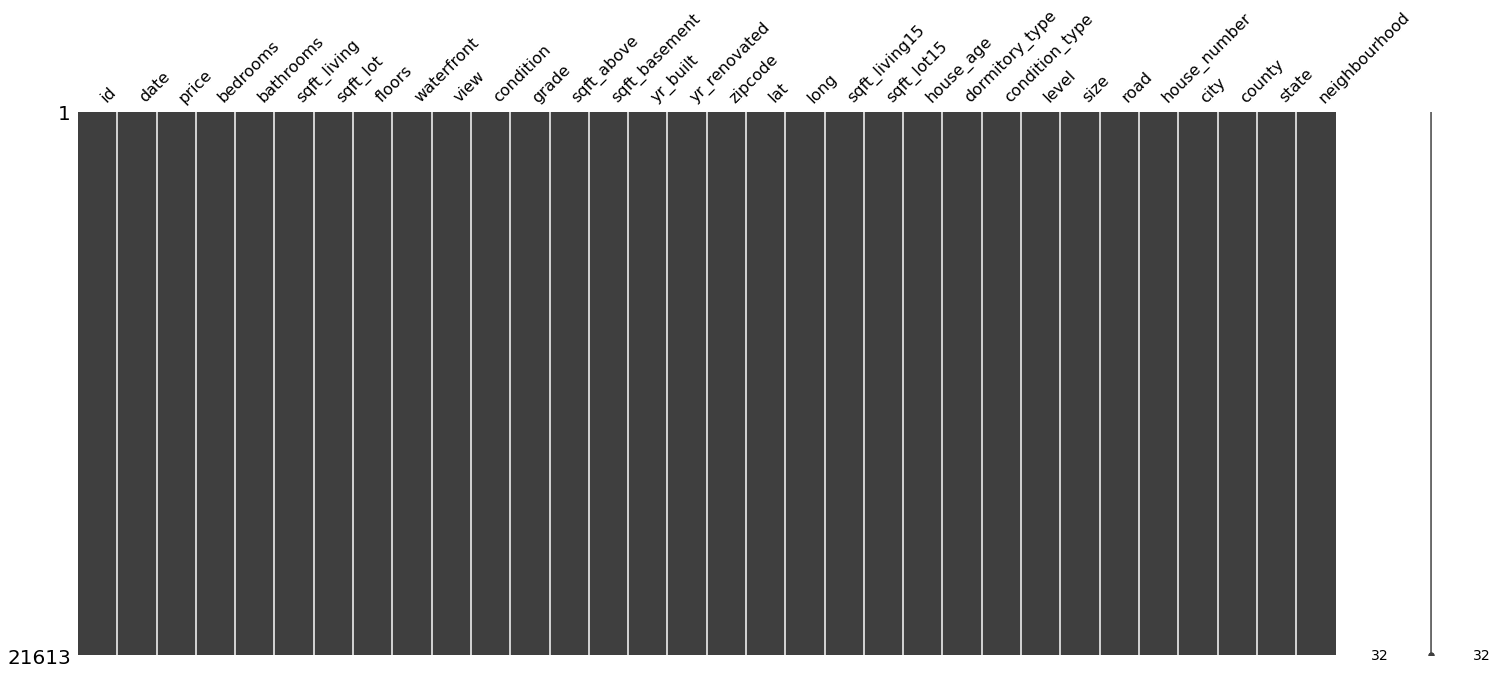

In [537]:
%matplotlib inline
msno.matrix(df);

## Adicione os seguinte filtros no Mapa: 
- Tamanho mínimo da área da sala de estar. 
- Número
mínimo de banheiros. 
- Valor Máximo do Preço. 
- Tamanho máximo da área do porão. 
-Filtro das Condições do Imóvel. 
- Filtro por Ano de Construção.


In [492]:
# Prepare data
    
df['is_waterfront'] = df['waterfront'].apply( lambda x: 'yes' if x == 1 else 'no' )

# # define level of prices

df['level']=df['price'].apply(lambda x:  0 if x<=321950 else
                                         1 if (x>321950)&(x<=450000)else
                                         2 if (x>450000)&(x<=645000)else 3)
df['level'] = df['level'].astype(int)

# Iteractive buttons

price_limit = widgets.IntSlider(
    value = int(df['price'].mean()),min = int(df['price'].min()),
    max = int(df['price'].max()),step = 1,description='Maximun Price',
    disable=False,style={'description_width': 'initial'}
    )

waterfront_bar = widgets.Dropdown(
    options = df['is_waterfront'].unique().tolist(),
    value = 'no',
    description = 'Water View',
    disable=False
    )

livingroom_limit = widgets.IntSlider(
    value = int( df['sqft_living'].mean() ),
    min = df['sqft_living'].min(),
    max = df['sqft_living'].max(),
    step = 1,
    description='Minimum Living Room Size',
    disable=False,
    style={'description_width': 'initial'}
)

bathroom_limit = widgets.IntSlider(
    value = int( df['bathrooms'].mean() ),
    min = df['bathrooms'].min(),
    max = df['bathrooms'].max(),
    step = 1,
    description='Minimum Bathroom Number',
    disable=False,
    style={'description_width': 'initial'}
)

basement_limit = widgets.IntSlider(
    value = int( df['sqft_basement'].mean() ),
    min = df['sqft_basement'].min(),
    max = df['sqft_basement'].max(),
    step = 1,
    description='Minimum Basement Size',
    disable=False,
    style={'description_width': 'initial'}
)

condition_limit = widgets.IntSlider(
    value = int( df['condition'].mean() ),
    min = df['condition'].min(),
    max = df['condition'].max(),
    step = 1,
    description='Minimum condition',
    disable=False,
    style={'description_width': 'initial'}
)

year_limit = widgets.IntSlider(
    value = int( df['yr_built'].mean() ),
    min = df['yr_built'].min(),
    max = df['yr_built'].max(),
    step = 1,
    description='Year Built',
    disable=False,
    style={'description_width': 'initial'}
)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Timestamp'

In [463]:
def update_map( df, waterfront, limit, livingroom_limit, bathroom_limit,basement_limit, 
               condition_limit, year_limit ):
    houses = df[(df['price'] <= limit) &
    (df['is_waterfront'] == waterfront) &
    (df['sqft_living'] >= livingroom_limit) &
    (df['bathrooms'] >= bathroom_limit) &
    (df['sqft_basement'] >= basement_limit) &
    (df['condition'] >= condition_limit) &
    (df['yr_built'] >= year_limit )][['id', 'lat', 'long', 'price','level']]
    
#plot map
    fig = px.scatter_mapbox( houses,
            lat="lat",
            lon="long",
            size="price",
            color="level",
            color_continuous_scale=px.colors.cyclical.IceFire,
            size_max=15,
            zoom=10)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()                    

In [464]:
widgets.interactive( update_map,
    df=fixed( df ),
    waterfront=waterfront_bar,
    limit=price_limit,
    livingroom_limit=livingroom_limit,
    bathroom_limit=bathroom_limit,
    basement_limit=basement_limit,
    condition_limit=condition_limit,
    year_limit=year_limit
)

NameError: name 'year_limit' is not defined

## Adicione os seguinte filtros no Dashboard: 
- Filtro por data disponível para compra. 
- Filtro por ano de renovação. 
- Filtro se possui vista para a água ou não.

In [108]:
# Change df format
df['year'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y' )
df['date'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y-%m-%d' )
df['year_week'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y-%U' )

# # ----------------------------
# # Filtering
# # ----------------------------

# Widget to control df
date_limit = widgets.SelectionSlider(
options = df['date'].sort_values().unique().tolist(),
value='2014-12-01',
description='Max Available Date',
disable=False,
continuous_update=False,
orientation='horizontal',
style={'description_width': 'initial'},
readout=True
)
# # Max Year Renovated
year_limit = widgets.SelectionSlider(
options = df['yr_renovated'].sort_values().sort_values().unique().tolist(),
value=2000,
description='Max Year',
disable=False,
continuous_update=False,
orientation='horizontal',
style={'description_width': 'initial'},
readout=True
)
# # Waterfront
waterfront_limit = widgets.Checkbox(
value=False,
description='Waterfront?',
disabled=False,
indent=False )
    
def update_map( df, date_limit, year_limit, waterfront_limit ):
    # Filter df
    df = df[(df['date'] <= date_limit) & 
            (df['yr_renovated'] >= year_limit) & 
            (df['waterfront'] == waterfront_limit)].copy()
    
    fig = plt.figure( figsize=(24, 12) )
    specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )
    
    ax1 = fig.add_subplot( specs[0, :] ) # First Row
    ax2 = fig.add_subplot( specs[1, 0] ) # First Row First Column
    ax3 = fig.add_subplot( specs[1, 1] ) # Second Row First Column
    
    # First Graph
    by_year = df[['price', 'year']].groupby( 'year' ).count().reset_index()
    sns.barplot( x = 'year', y ='price', data=by_year, ax=ax1)
    
#   # Second Graph

    by_day = df[['price', 'date']].groupby( 'date' ).mean().reset_index()
    sns.lineplot( x='date', y='price',data=by_day, ax=ax2)
    ax2.set_title( "Title: Avg Price by Day" )
    
#   # Third Graph
    
    df['year_week'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y-%U' )
    by_week_of_year = df[['price', 'year_week']].groupby( 'year_week' ).mean().reset_index()
    sns.barplot( x='year_week', y='price', data=by_week_of_year,ax=ax3 )
    ax3.set_title( "Title: Avg Price by Week of Year" )
    
    plt.xticks( rotation=60);



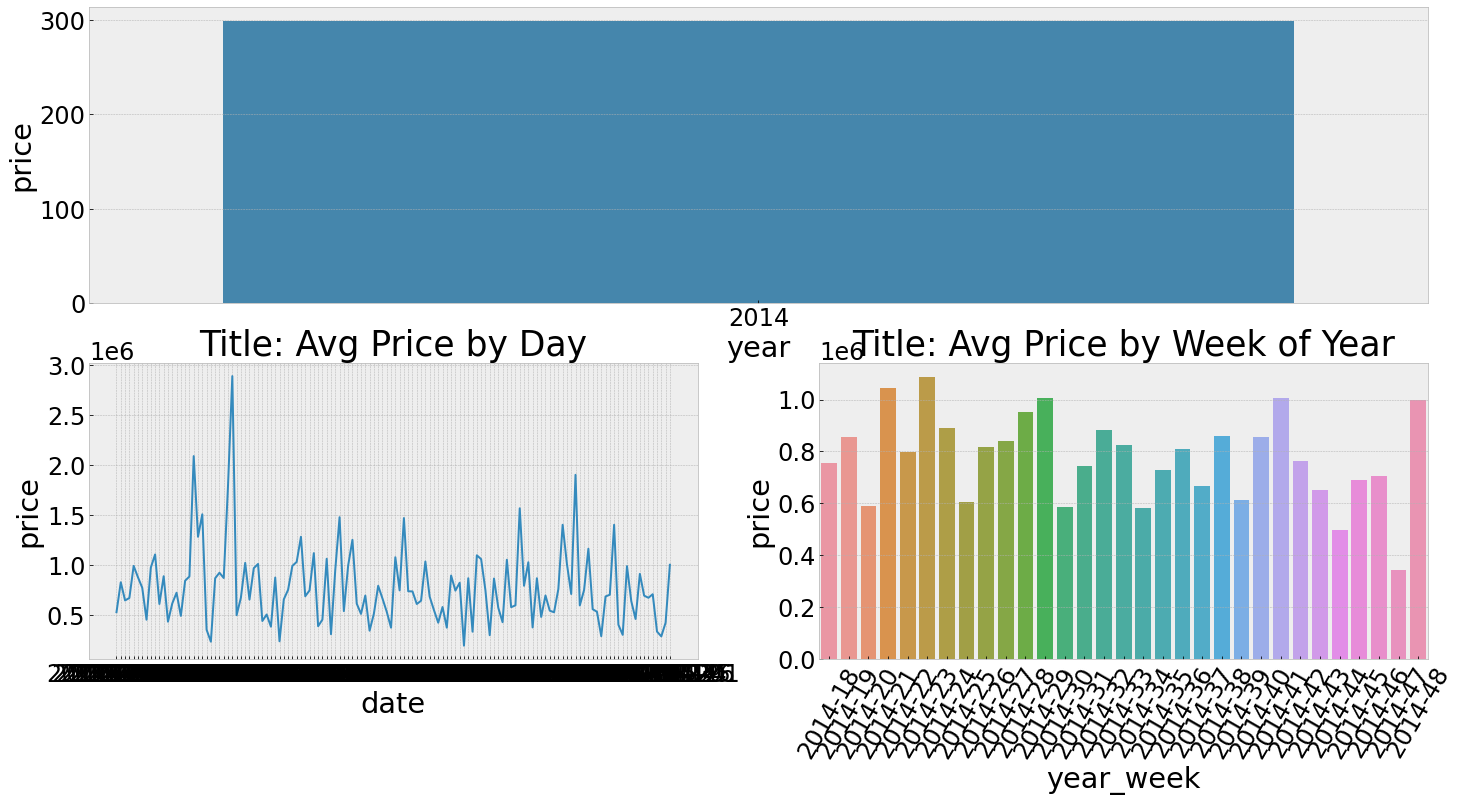

In [109]:
widgets.interactive( update_map,df = fixed(df),
date_limit=date_limit,
year_limit=year_limit,
waterfront_limit=waterfront_limit )